<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Walt9819/blob/developing/Week3/Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Nombre de la entrega**: Actividad 1
### **Nombre del alumno**: Walter André Hauri Rosales
### **Matrícula del alumno**: A01794237
### **Profesor titular**: Jobish Vallikavungal Devassia
### **Profesor tutor**: Victoria Guerrero Orozco 
#### **Fecha**: 04 de octubre de 2022

### Parte 1: Fundamentos de bases de datos

### Fundamentos de bases de datos y almacenes de datos (Data Warehouse) para ciencia de datos.

La capacidad de almacenar datos es lo que ha dado la posibilidad de su uso como método de análisis y predicción. De forma sencilla, un data scientist no puede trabajar si no tiene datos, de ahí lo crucial de las bases de datos.

Existen dos tipos de bases de datos:
  - **SQL**: Las cuales se conforman de tablas relacionadas, que permiten tener una alta consistencia y disponibilidad.
  - **NoSQL**: Estas cuentan con una estructura tipo texto, lo cual hace que no requieran una consistencia total entre tablas para poder crearse, es decir, tienen un esquema (_schema_) más flexible. Esto permite que tenga una alta capacidad de partirse o dividirse sin corromper la estructura.

Las bases de datos pueden ser almacenadas de muchas maneras distintas, una de las predominantes es el data warehouse. En ellas se pueden almacenar diferentes tipos de conjuntos de datos, dando la posibilidad de posteriormente relacionarlas para su uso en analítica y machine learning. En particular tienen la diferencia de que están pensadas para su uso y actualización constante en periodos regulares a través de _logs_ o registros de actividad, mientras que las bases de datos (_database_) están pensadas principalmente para optimizar los tiempos de respuesta y de espacio en memoria, además de que tienen una actualización por evento o transacción. Una de las características principales es la flexibilidad que otorga un data warehouse para tener información de diferentes departamentos y/o áreas, las cuales pueden ser procesadas posteriormente o en tiempo real con métodos de BI o machine learning, reforzados por técnicas de Big Data.

### Proceso de uniformidad y limpieza de datos.

Como se mencionó, los datos son la necesidad básica de un data scientist. A pesar de que en años recientes el volumen de datos ha crecido de forma impresionante, no todos ellos tienen la forma o estructura deseada, dejando grandes espacios de datos vacíos o incompletos que se convierten en un problema.

La estrategia básica ante este conflicto es simplemente ignorar aquellos registros que tienen valores vacíos o inconsistentes. La cuestión es que, cuando no se cuenta con una base de datos muy basta, se pierde demasiada información, o incluso habrá ocasiones donde este tipo de comportamientos fueron hechos a propósito (con algún objetivo) y conociendo esta información se podrían llegar a recuperar cantidades valiosas de datos que mejoren los modelos y el análisis.

Para tratar situaciones especiales donde los errores fueron totalmente aleatorios o tienen una distribución aleatoria (MRAC y MAC), se han propuesto técnicas que permiten llenar los valores faltantes, tratando de aumentar la cantidad de datos a utilizar, buscando evitar lo más posible el afectar la distribución y/o correlación de los datos (cosa que no siempre se logra).

Algunas de las técnicas más utilizadas es la imputación de valores, ya sea de un valor determinado _a priori_, tomado de registros del mismo conjunto de datos, o de sus estadísticos (como la media y la mediana), incluso métodos predictivos como regresiones. Todas estas herramientas buscan aumentar lo más posible la cantidad de datos, lo cual es importante; pero resulta crucial conocer sus afectaciones y limitantes, así como documentar las asunciones que se hacen para posteriormente entender los resultados de los modelos basados en estos datos.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv", index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Observamos las estadísticas de cada una de las columnas

In [56]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


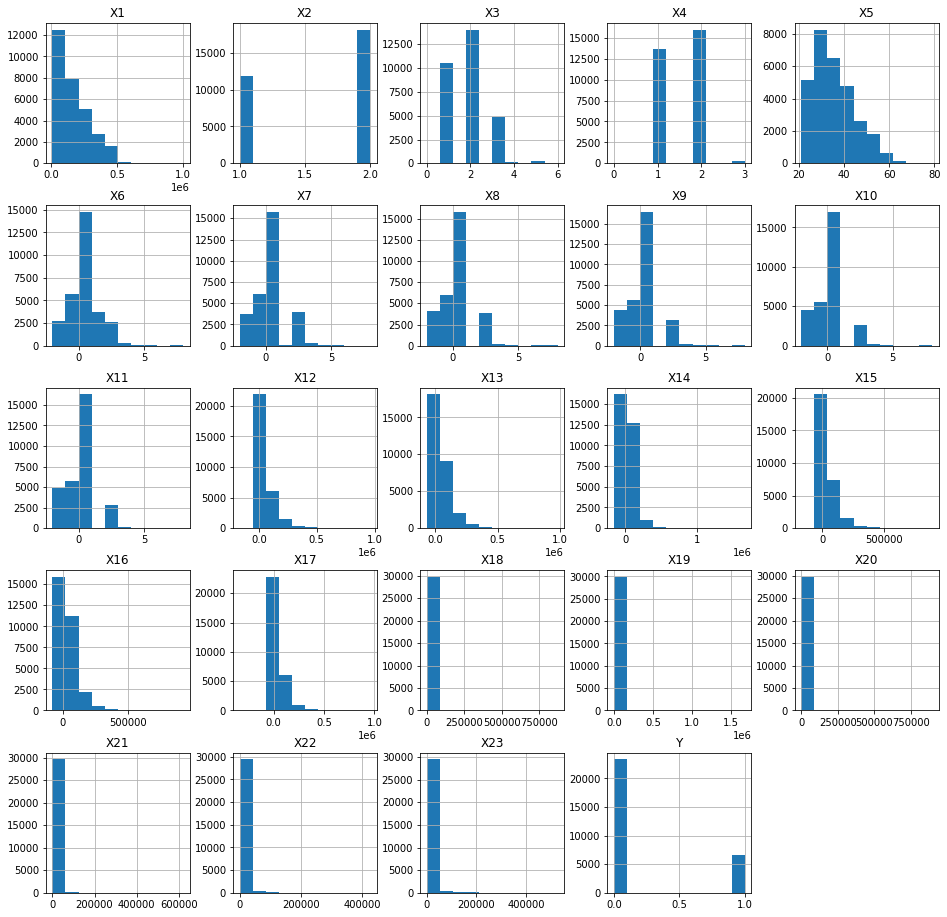

In [57]:
df.hist(figsize=(16, 16));

Revisamos el númeor de NaN's por columna en todo el DataFrame

In [58]:
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

### Columna X1
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**NO TIENE NAN**, por tanto no hay que procesarlo, está completa la columna

### Columna X2
X2: Gender (1 = male; 2 = female).

En este caso la base de datos cuenta únicamente con un registro faltante en esta columna. La pasamos a observar.

In [59]:
df[df['X2'].isna()].isna().sum()

X1     0
X2     1
X3     1
X4     1
X5     1
X6     1
X7     1
X8     1
X9     1
X10    1
X11    1
X12    1
X13    1
X14    1
X15    1
X16    1
X17    1
X18    1
X19    1
X20    1
X21    1
X22    1
X23    0
Y      0
dtype: int64

In [60]:
missing = df[df['X2'].isna()] # row with missing data
missing

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
24366,130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,0.0


Podemos observar que cuenta con la mayoría de las columnas como NaN, de forma que el resgistro no aporta gran valor, debido a que más de la mitad d ela información no fue recabada. 

Dicho esto se pasa a eliminar la fila.

In [61]:
cleaned = df.copy() # dataframe where the cleaned data will be placed
cleaned = cleaned.drop(missing.index)
cleaned.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29999.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29994.000000,29996.000000
mean,167485.572186,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.420884,0.221196
std,129749.643651,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17779.122899,0.415059
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


### Columna X3
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

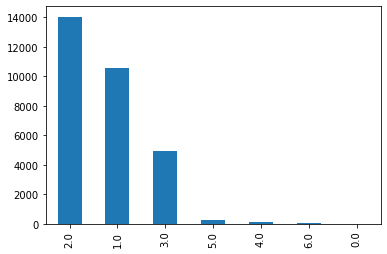

In [62]:
x3 = df["X3"]
x3.value_counts().plot(kind='bar');

Podemos observar que los valores descritos en la documentación de la base de datos son de 1 a 4, mientras que hay valores 5, 6 y 0. 

En este caso se asumirá que el 5 y 6 hacen referencia a valores más altos que 3, por tanto sería posible mandarlos a la categoría 4. E igualmente el 0 es posible que se considere como _graduate school_ incompleta, por tanto también entrarían en la categoría _other_.

In [63]:
x3.unique() # unique values to map

array([ 2.,  1.,  3.,  5.,  4.,  6.,  0., nan])

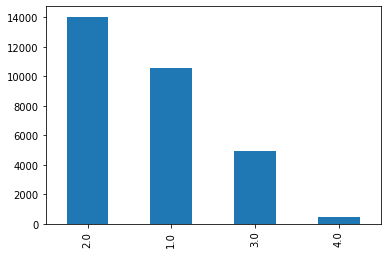

In [64]:
x3 = x3.map(lambda x: x if x >= 1 and x <= 3 else 4) # map anything that is not in valid categories to the _other_ category (4), even NaN's
x3.value_counts().plot(kind='bar');

In [65]:
cleaned["X3"] = x3

### Columna X4
X4: Marital status (1 = married; 2 = single; 3 = others).

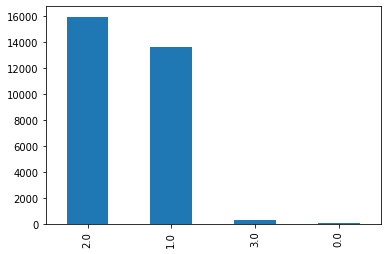

In [66]:
x4 = df["X4"]
x4.value_counts().plot(kind='bar');

Siguiendo la misma estrategia que en la columna anterior, podemos encapsular los datos fuera de las categorías en la categoría de _other_.

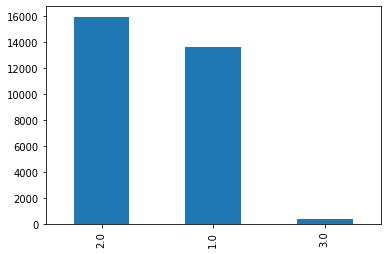

In [67]:
x4 = x4.map(lambda x: x if x >= 1 and x <= 2 else 3) # map anything that is not in valid categories to the _other_ category (3), even NaN's
x4.value_counts().plot(kind='bar');

In [68]:
cleaned["X4"] = x4

### Columna X5
X5: Age (year).

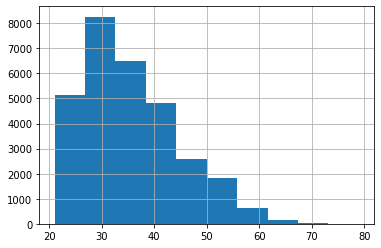

In [69]:
x5 = df["X5"]
x5.hist();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


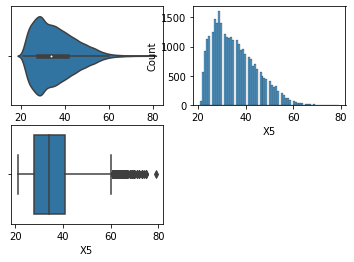

In [70]:
plt.subplot(2, 2, 1)
sns.violinplot(x5);
plt.subplot(2, 2, 2)
sns.histplot(x5);
plt.subplot(2, 2, 3)
sns.boxplot(x5);

In [71]:
x5.describe()

count    29995.000000
mean        35.484214
std          9.218024
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

En este caso tenemos una variable numérica, la cual si analizamos la distribución podemos notar que está ligeramente con sesgo positivo (cola a la izquierda).

Por otro lado, al revisar los estadísticos encontramos que la media y la mediana tienen valores cercanos, sin embargo, el valor de la media es con punto flotante, mientras que las edades se dan en valores enteros. Por esta razón se opta por utilizar la mediana (34 años), misma que tiene apenas una diferencia de 1 año con la media. 

De forma similar, al tener esta distribución, como se observa en el boxplot, existen varios outliers que pueden llegar a modificar el valor de la media, por lo que resulta un valor más consistente y robusto con la distribución la mediana.

In [72]:
x5 = x5.fillna(x5.median())
cleaned["X5"] = x5

### Columnas X6-X11
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

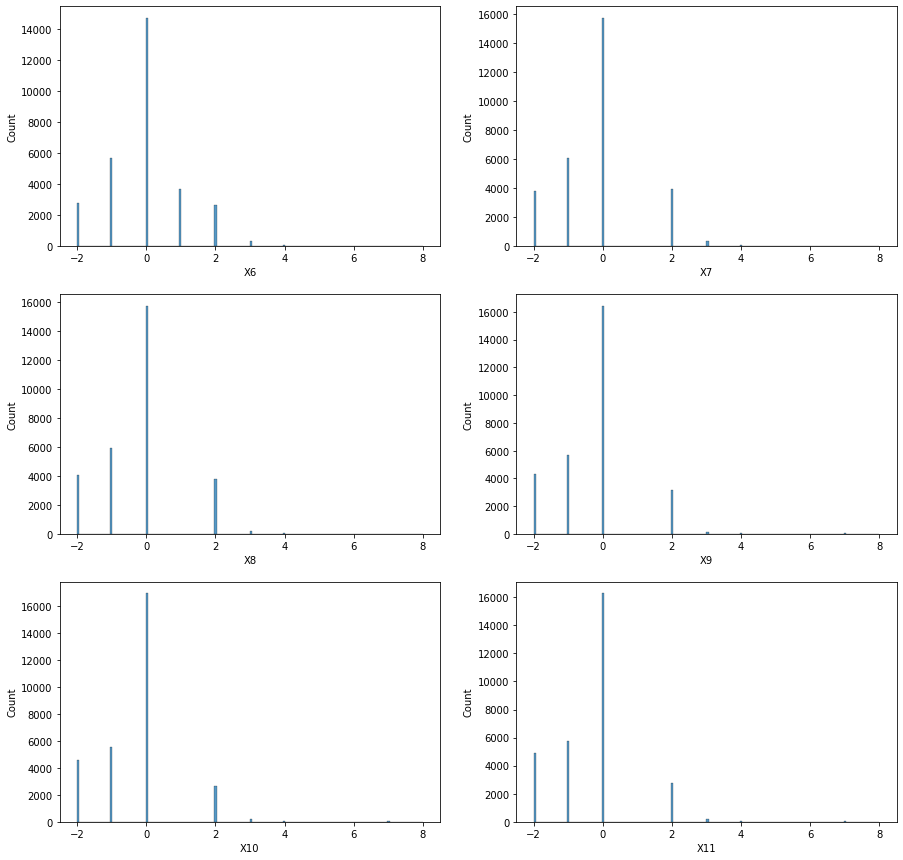

In [73]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i in range(6, 12):
  plt.subplot(3, 2, i - 5)
  x = df[f"X{i}"]
  sns.histplot(x)

Se puede notar que los valores tanto `-2` como `0` es posible que tiendan a hacer referencia al `-1` que indica _pay duly_. En este caso se hace el mapa de ellos hacia la categoría `0` para mantener una consistencia numérica. Es decir, las categorías `-2`, `-1` y `0` originales, serán pasadas a la categoría `0`.

In [74]:
# Map all values less or equal to 0 to 0
def mapToZero(x):
  return x.map(lambda v: v if v > 0 else 0)

# Get columns from 6 to 11
x6_to_11 = df[[f"X{i}" for i in range(6, 12)]]

new_x6_to_11 = pd.DataFrame()
# Map each column
for i, (col, x) in enumerate(x6_to_11.items()):
  new_x6_to_11[col] = mapToZero(x)

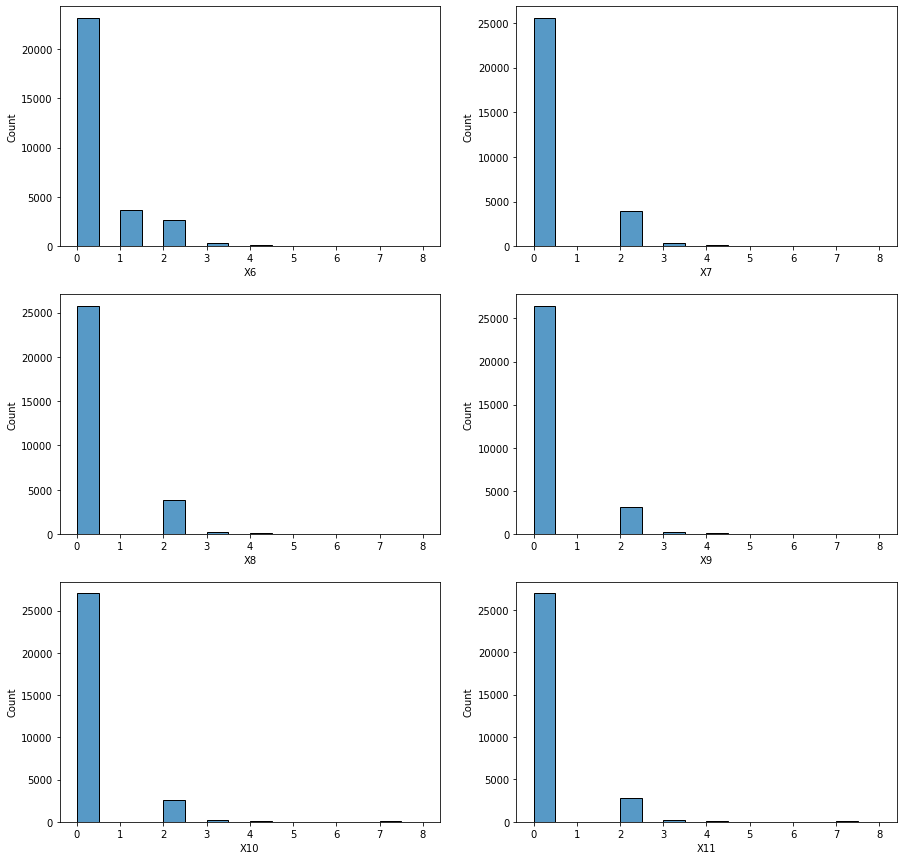

In [75]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i in range(6, 12):
  plt.subplot(3, 2, i - 5)
  x = new_x6_to_11[f"X{i}"]
  sns.histplot(x)

En este caso la mediana resultaría la mejor métrica para llenar los valores faltantes, debido a que nuevamente es una variable categórica, y el promedio podría tener un valor decimal.

In [76]:
for i in range(6, 12):
  median = cleaned[f"X{i}"].median()
  cleaned[f"X{i}"].fillna(cleaned[f"X{i}"].median(), inplace=True)

### Columnas X12-X17
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

In [77]:
# Plot violinplot, boxplot and histogram for passed series
def plotDist(x):
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))
  plt.subplot(2, 2, 1)
  sns.violinplot(x);
  plt.subplot(2, 2, 2)
  sns.histplot(x);
  plt.subplot(2, 2, 3)
  sns.boxplot(x);

Visualizamos el comportamiento de una de las variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


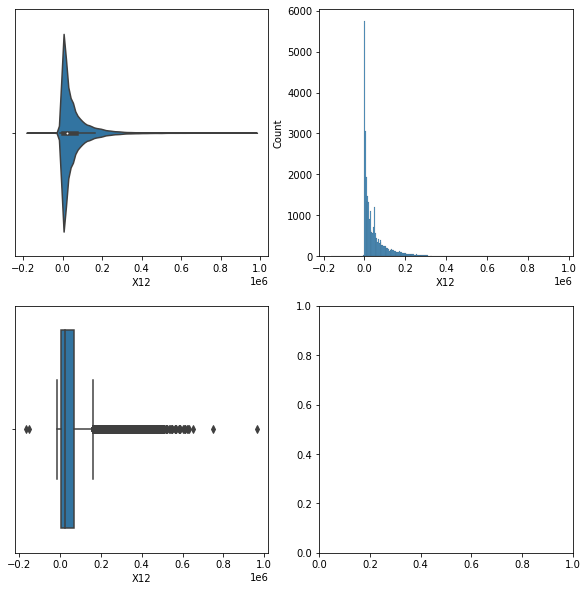

In [78]:
plotDist(df["X12"])

Se puede notar que nuevamente tiene una distribución con sesgo positivo, lo que indica que tienden a existir valores mayormente cercanos al 0, y algunos outliers muy grandes.

In [104]:
# Get columns from 12 to 17
x12_to_17 = df[[f"X{i}" for i in range(12, 18)]]
x12_to_17.describe()

,X12,X13,X14,X15,X16,X17
count,29989.000000,29989.000000,2.998700e+04,29985.000000,29983.000000,29990.000000
mean,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745
std,73645.219278,71183.385123,6.936086e+04,64345.500073,60809.984983,59561.312967
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3565.000000,2986.000000,2.667500e+03,2329.000000,1763.500000,1256.250000
50%,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000
75%,67139.000000,64027.000000,6.018200e+04,54560.000000,50213.000000,49208.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Este comportamiento se puede notar para todas las columnas, ya que los máximos y mínimos son muy comtrastantes, además de que al comparar los promedios con las medianas, existen grandes discrepancias.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, 'Columna')

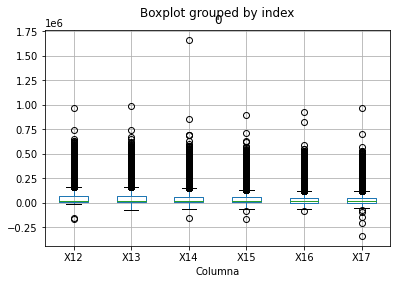

In [105]:
x12_to_17_stack = x12_to_17.stack(level=0).reset_index(level=0, drop=True).reset_index() # Convert columns to rows levels
x12_to_17_stack.boxplot(by="index").set_xlabel("Columna")

Podemos notar que para todas las variables la distribución es muy similar, por lo que podemos optar usar la mediana en cada caso. Igualmente se podría implementar una estrategia donde se haga una regresión lineal o una interpolación, pero en lugar de ser por columna, se hiciera por fila, ya que es el histórico de cada persona y tendría que existir una consistencia entre un periodo anterior y uno posterior (mes con mes).

In [112]:
x12_to_17 = x12_to_17.interpolate(method="linear", axis=1) # interpolate row-wise all columns with available data

In [113]:
x12_to_17[x12_to_17.isna().sum(axis=1) > 0] # see missing data

,X12,X13,X14,X15,X16,X17
ID,,,,,,
19,NaN,NaN,NaN,NaN,NaN,NaN
6228,NaN,NaN,NaN,NaN,NaN,21120.0
24124,NaN,NaN,NaN,NaN,NaN,NaN
24366,NaN,NaN,NaN,NaN,NaN,NaN
29734,NaN,NaN,NaN,NaN,NaN,NaN
29735,NaN,NaN,NaN,NaN,NaN,NaN
29736,NaN,NaN,NaN,NaN,NaN,NaN
29825,NaN,NaN,NaN,NaN,NaN,NaN
29826,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Missing values, fill with column-wise median
for i in range(12, 18):
  median = cleaned[f"X{i}"].median()
  cleaned[f"X{i}"].fillna(x12_to_17[f"X{i}"].median(), inplace=True)

### Columnas X18-X23
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [118]:
# Get columns from 18 to 23
x18_to_23 = df[[f"X{i}" for i in range(18, 24)]]
x18_to_23.describe()

,X18,X19,X20,X21,X22,X23
count,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000
mean,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000
50%,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, 'Columna')

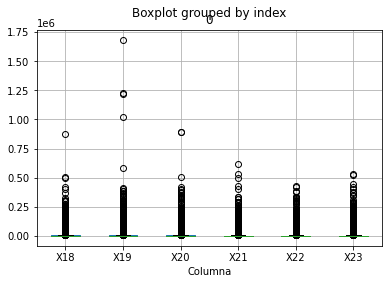

In [119]:
x18_to_23_stack = x18_to_23.stack(level=0).reset_index(level=0, drop=True).reset_index() # Convert columns to rows levels
x18_to_23_stack.boxplot(by="index").set_xlabel("Columna")

Nuevamente, al ser valores numéricos y con una distribución no uniforme, podemos utilizar la interpolación a nivel de fila, y posteriormente los faltantes con una mediana.

In [120]:
x18_to_23 = x18_to_23.interpolate(method="linear", axis=1) # interpolate row-wise all columns with available data

In [122]:
x18_to_23 = x18_to_23.fillna(method="bfill", axis=1) # fill na with next valid value

,X18,X19,X20,X21,X22,X23
ID,,,,,,
1,0.0,689.0,0.0,0.0,0.0,0.0
2,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...
29996,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [124]:
x18_to_23 = x18_to_23.fillna(method="bfill", axis=1) # fill na with next valid value

In [125]:
x18_to_23[x18_to_23.isna().sum(axis=1) > 0] # see missing data

,X18,X19,X20,X21,X22,X23
ID,,,,,,
6233,NaN,NaN,NaN,NaN,NaN,NaN
29825,NaN,NaN,NaN,NaN,NaN,NaN
29826,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Missing values, fill with column-wise median
for i in range(18, 24):
  median = cleaned[f"X{i}"].median()
  cleaned[f"X{i}"].fillna(x18_to_23[f"X{i}"].median(), inplace=True)

### Última revisión

In [127]:
cleaned.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000,29996.000000
mean,167485.572186,1.603753,1.842261,1.557352,35.484016,-0.016634,-0.133671,-0.166372,-0.220741,-0.266209,...,43264.347578,40312.644255,38874.595487,5662.114504,5.921445e+03,5224.824061,4826.143405,4799.197073,5215.801460,0.221196
std,129749.643651,0.489125,0.744551,0.521460,9.217426,1.123792,1.197175,1.195931,1.169002,1.133029,...,64332.610815,60795.929903,59553.574258,16562.321769,2.304119e+04,17606.445799,15666.257869,15278.413665,17777.705881,0.415059
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1769.000000,1258.000000,1000.000000,8.360000e+02,390.000000,298.000000,254.500000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54509.000000,50178.000000,49200.500000,5006.000000,5.000000e+03,4504.500000,4013.000000,4031.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Nos aseguramos que ya no haya valores nulos

In [129]:
cleaned.isna().sum(axis=0)

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      3
dtype: int64

Eliminamos las columnas que no tienen la predicción

In [130]:
cleaned = cleaned.dropna()

In [134]:
cleaned.isna().sum(axis=0)

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [ ]:
cleaned.to_csv("Cleaned_dataset.csv") # Export data